# Single turn PS injection analysis with SEM Grid 48, 52, 54

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [106]:
from scipy.optimize import curve_fit

def gaussian_function(x, a, I, mu, sig):
    return a + I / np.sqrt(2 * np.pi * sig ** 2) * np.exp(-(x - mu) ** 2 / 2. / sig ** 2)

def do_gaussian_fit(x,y):
    mu = np.average(x, weights=np.abs(y - np.min(y)))
    sigma = np.sqrt(np.average(x**2, weights=np.abs(y - np.min(y))) - mu**2)
    p0 = [y.min(), (np.max(y) - np.min(y)) * np.sqrt(2 * np.pi * sigma**2), mu, sigma]
    popt, pcov = curve_fit(gaussian_function, x, y, p0=p0, maxfev=1000) # maxfev is the number of tries it does the fit
    return popt, pcov

In [141]:
# Find all files that start with "my_particles"
file_list = glob.glob("temp/BSG_STUDY_TAG*")
file_list

['temp/BSG_STUDY_TAG_2023-03-03 13:37:58.179990',
 'temp/BSG_STUDY_TAG_2023-03-03 13:42:12.257252',
 'temp/BSG_STUDY_TAG_2023-03-03 13:54:54.752090',
 'temp/BSG_STUDY_TAG_2023-03-03 13:56:30.974132',
 'temp/BSG_STUDY_TAG_2023-03-03 13:59:30.335248',
 'temp/BSG_STUDY_TAG_2023-03-09 11:12:52.892131',
 'temp/BSG_STUDY_TAG_2023-03-09 13:09:28.066417',
 'temp/BSG_STUDY_TAG_2023-03-09 13:10:47.537743',
 'temp/BSG_STUDY_TAG_2023-03-09 13:12:43.660884',
 'temp/BSG_STUDY_TAG_2023-03-09 14:59:47.325801',
 'temp/BSG_STUDY_TAG_2023-03-09 15:33:45.040840',
 'temp/BSG_STUDY_TAG_2023-03-09 15:42:25.330524',
 'temp/BSG_STUDY_TAG_2023-03-09 15:51:10.388400',
 'temp/BSG_STUDY_TAG_2023-03-09 16:14:14.425388',
 'temp/BSG_STUDY_TAG_2023-03-09 16:23:54.142312',
 'temp/BSG_STUDY_TAG_2023-03-09 16:27:08.165006',
 'temp/BSG_STUDY_TAG_2023-03-09 16:28:28.702082',
 'temp/BSG_STUDY_TAG_2023-03-09 16:31:19.802291',
 'temp/BSG_STUDY_TAG_2023-03-09 16:33:27.401524',
 'temp/BSG_STUDY_TAG_2023-03-09 16:35:30.124976',


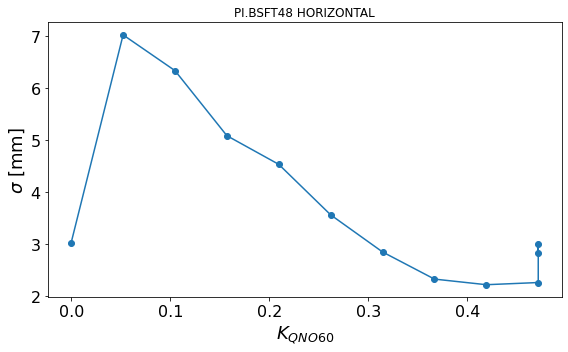

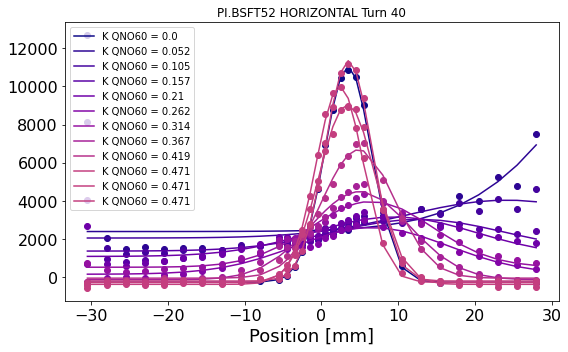

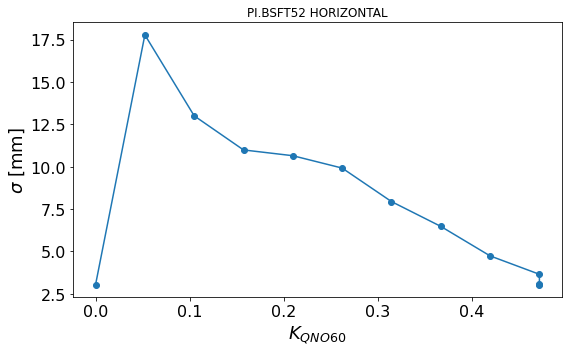

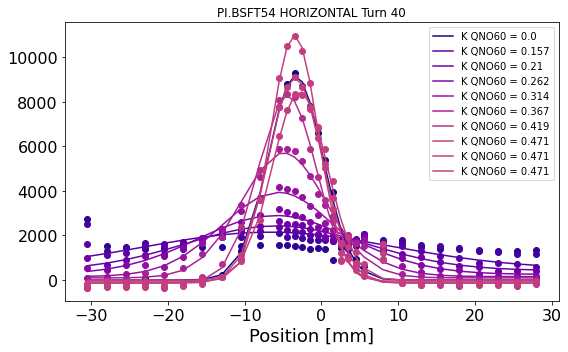

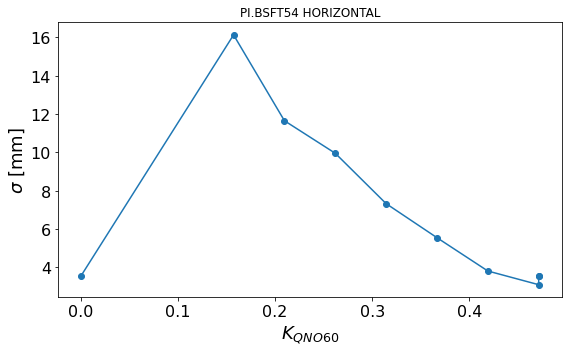

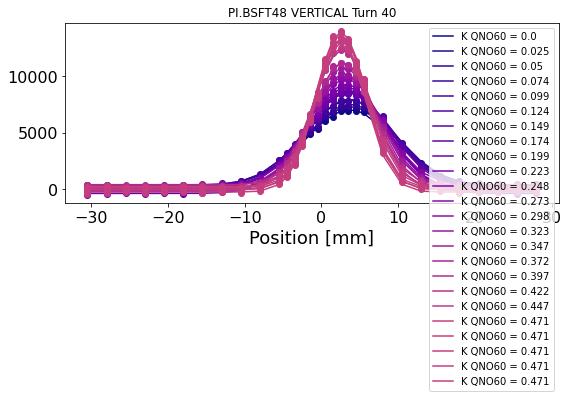

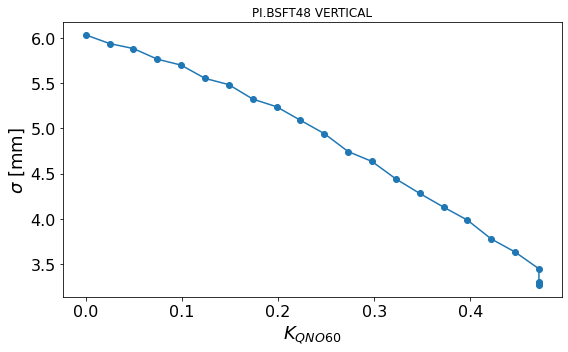

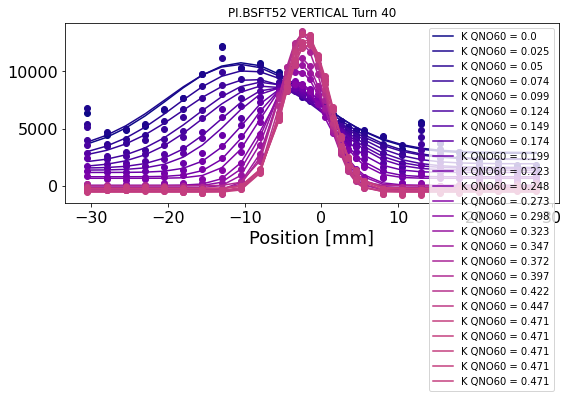

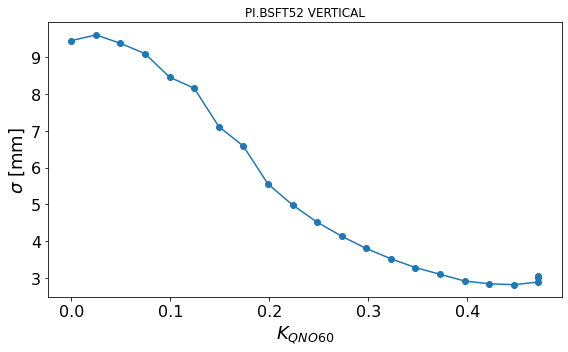

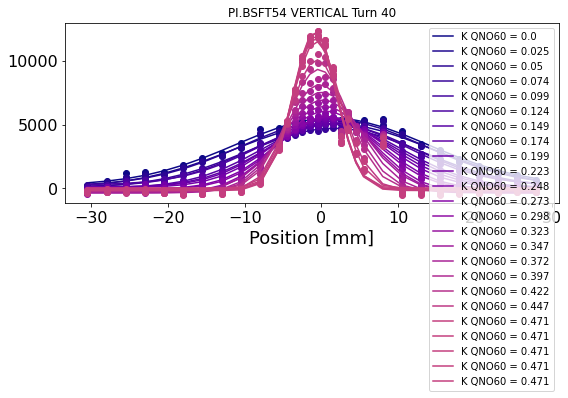

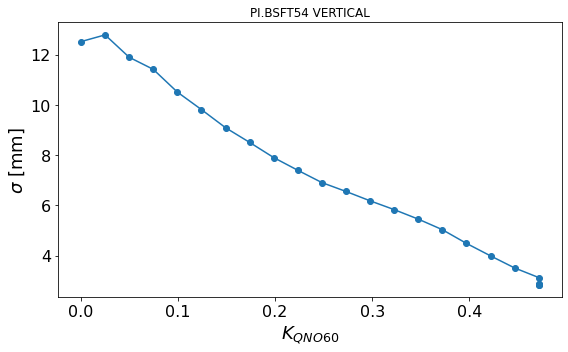

In [163]:
for interesting_file in [file_list[-1], file_list[-2]]:

    file_list2 = glob.glob(f"{interesting_file}/*")



    # Define the colormap and the range of values to map to it
    cmap = plt.cm.get_cmap('plasma')
    vmin, vmax = 0.0, 1.0
    
    
    for instrument in ['PI.BSFT48', 'PI.BSFT52', 'PI.BSFT54']:
        k_list = []
        sigma_list = []
        fig, ax = plt.subplots(tight_layout=True, figsize=(8,5))
        for file in file_list2:
            with open(file, 'r') as f:
                # Load the JSON data from the file
                data = json.load(f)


                pos = np.array(data[3][instrument][0]["projPositionSet1"]["data"]).reshape(-1, 31)
                sem48 = np.array(data[3][instrument][0]["projDataSet1"]["data"]).reshape(-1, 31)

                turn=40

                # Map the value of BTP.QNO60_K to a color in the colormap
                value = data[0]['BTP.QNO60_K']
                norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
                color = cmap(norm(value))

                ax.plot(pos[turn], sem48[turn], c=color, marker="o", ls="")

                try:
                    x = pos[turn]
                    y = sem48[turn]
                    popt, pcov = do_gaussian_fit(x,y)
                    ax.plot(x, gaussian_function(x, popt[0], popt[1], popt[2], popt[3]), c=color, label=f"K QNO60 = {round(data[0]['BTP.QNO60_K'],3)}")

                    k_list.append(data[0]['BTP.QNO60_K'])
                    sigma_list.append(popt[3])
                except:
                    pass

        ax.set_xlabel(f"Position [mm]", fontsize=18)
        ax.set_title(f"{instrument} {data[3][instrument][0]['planeSet1'][1]} Turn {turn}")
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)
        ax.legend()
    #     plt.savefig("sem48.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

        fig, ax = plt.subplots(tight_layout=True, figsize=(8,5))
        ax.plot(k_list, sigma_list, marker="o")
        ax.set_xlabel(r"$K_{QNO60}$", fontsize=18)
        ax.set_ylabel("$\sigma$ [mm]", fontsize=18)
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)
        ax.set_title(f"{instrument} {data[3][instrument][0]['planeSet1'][1]}")

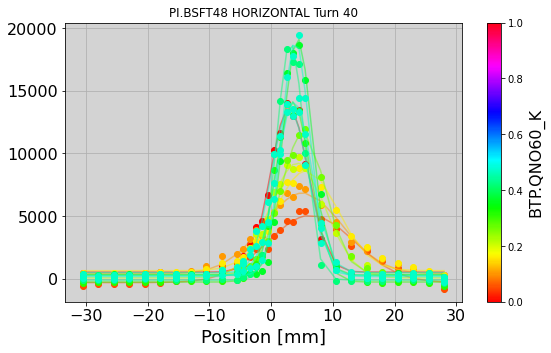

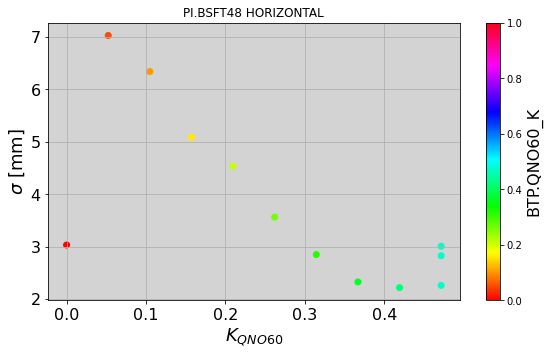

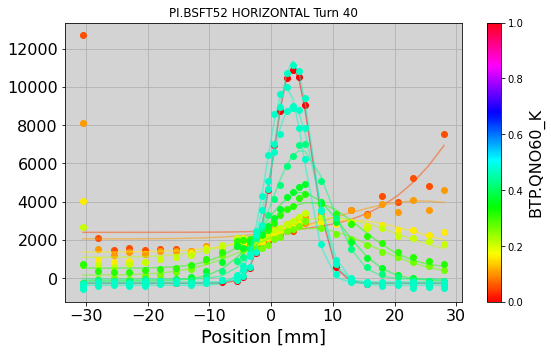

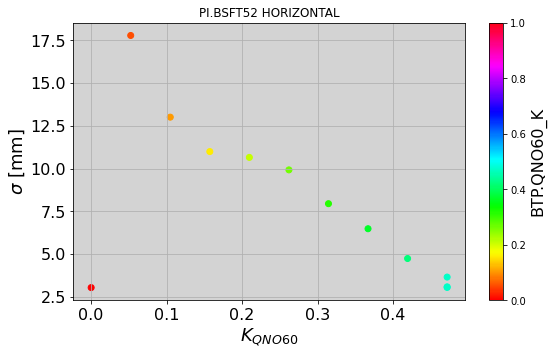

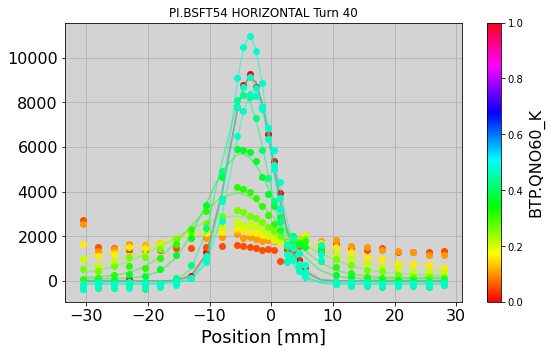

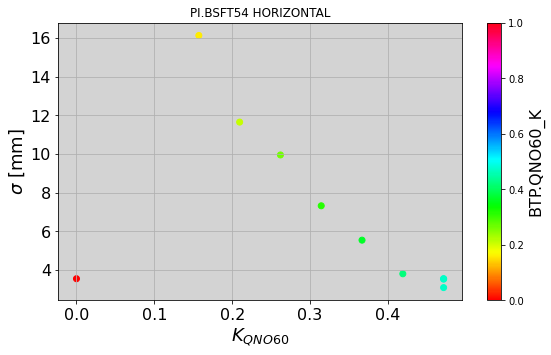

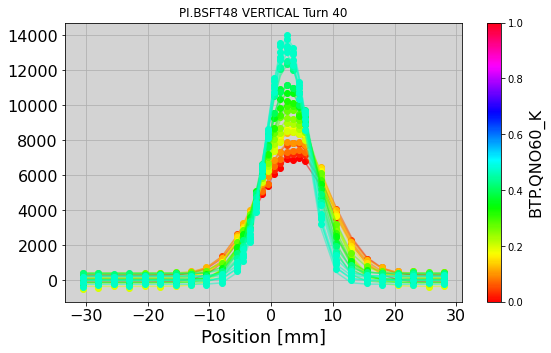

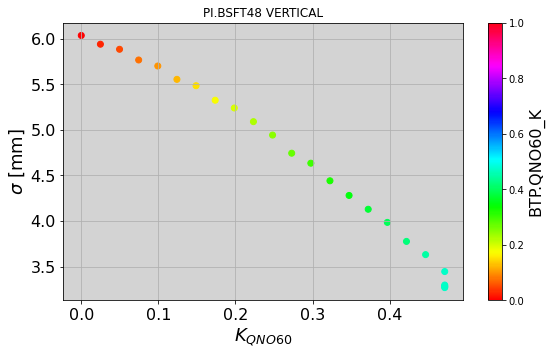

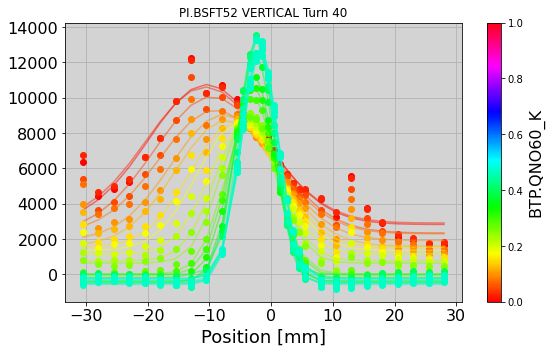

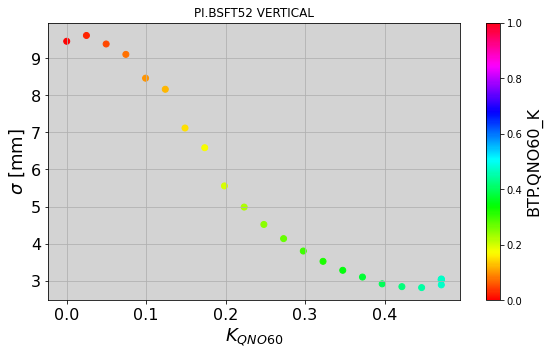

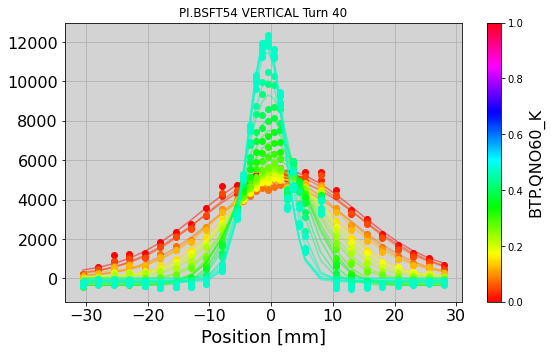

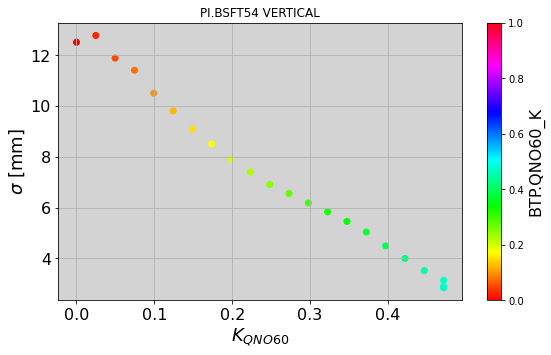

In [181]:
for interesting_file in [file_list[-1], file_list[-2]]:

    file_list2 = glob.glob(f"{interesting_file}/*")

    # Define the colormap and the range of values to map to it
    cmap = plt.cm.get_cmap('hsv')
    vmin, vmax = 0.0, 1.0

    for instrument in ['PI.BSFT48', 'PI.BSFT52', 'PI.BSFT54']:
        k_list = []
        sigma_list = []
        fig, ax = plt.subplots(tight_layout=True, figsize=(8,5))
        fig.set_facecolor('white')
        ax.set_facecolor('lightgray')
        for file in file_list2:
            with open(file, 'r') as f:
                # Load the JSON data from the file
                data = json.load(f)

                pos = np.array(data[3][instrument][0]["projPositionSet1"]["data"]).reshape(-1, 31)
                sem48 = np.array(data[3][instrument][0]["projDataSet1"]["data"]).reshape(-1, 31)

                turn=40

                # Map the value of BTP.QNO60_K to a color in the colormap
                value = data[0]['BTP.QNO60_K']
                norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
                color = cmap(norm(value))

                ax.plot(pos[turn], sem48[turn], c=color, marker="o", ls="")

                try:
                    x = pos[turn]
                    y = sem48[turn]
                    popt, pcov = do_gaussian_fit(x,y)
                    ax.plot(x, gaussian_function(x, popt[0], popt[1], popt[2], popt[3]), c=color, alpha=0.5)

                    k_list.append(data[0]['BTP.QNO60_K'])
                    sigma_list.append(popt[3])
                except:
                    pass

        # Create a ScalarMappable object to map values to colors
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        ax.set_xlabel(f"Position [mm]", fontsize=18)
        ax.set_title(f"{instrument} {data[3][instrument][0]['planeSet1'][1]} Turn {turn}")
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)
        ax.grid()
#         ax.legend()
        cbar = fig.colorbar(sm, ax=ax)
        cbar.ax.set_ylabel('BTP.QNO60_K', fontsize=16)
        plt.savefig("Position_"+str(instrument)+"_"+str(data[3][instrument][0]['planeSet1'][1])+".png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

        fig, ax = plt.subplots(tight_layout=True, figsize=(8,5))
        ax.set_facecolor('lightgray')
        ax.scatter(k_list, sigma_list, c=cmap(norm(k_list)), marker="o")
        ax.set_xlabel(r"$K_{QNO60}$", fontsize=18)
        ax.set_ylabel("$\sigma$ [mm]", fontsize=18)
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)
        ax.set_title(f"{instrument} {data[3][instrument][0]['planeSet1'][1]}")
        cbar = fig.colorbar(sm, ax=ax)
        cbar.ax.set_ylabel('BTP.QNO60_K', fontsize=16)
        ax.grid()
        plt.savefig("Sigma_"+str(instrument)+"_"+str(data[3][instrument][0]['planeSet1'][1])+".png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')